# Question 1 : Différentiabilité de $ J(u) $ et calcul du gradient

1) Problème posé

On cherche à minimiser la fonctionnelle de coût :
$
J(u) = \frac{1}{2} \int_0^T (y_u(t, L) - z_d(t))^2 \, dt + \frac{\varepsilon}{2} \int_0^T u(t)^2 \, dt,
$
où $ y_u $ est la solution de l'équation de la chaleur :
\[
\begin{cases}
\partial_t y_u(t, x) - \partial_{xx} y_u(t, x) = 0, & (t, x) \in (0, T) \times (0, L), \\
y_u(0, x) = 0, & x \in [0, L], \\
y_u(t, 0) = 0, & t \in [0, T], \\
\partial_x y_u(t, L) = u(t), & t \in [0, T].
\end{cases}
\]

2) Différentiabilité de $ J(u) $

Soit une perturbation $ \delta u  $ de $ u $. La solution $ y_u $ varie en conséquence, et cette variation est notée $ \delta y $. Linéarisons l'équation de la chaleur pour $ \delta y $ :

\begin{cases}
\partial_t \delta y(t, x) - \partial_{xx} \delta y(t, x) = 0, & (t, x) \in (0, T) \times (0, L), \\
\delta y(0, x) = 0, & x \in [0, L], \\
\delta y(t, 0) = 0, & t \in [0, T], \\
\partial_x \delta y(t, L) = \delta u(t), & t \in [0, T].
\end{cases}


En substituant $ u + \delta u $ dans $ J(u) $, on obtient  :
$
\delta J = \int_0^T \left( y_u(t, L) - z_d(t) \right) \delta y(t, L) \, dt + \varepsilon \int_0^T u(t) \delta u(t) \, dt.
$

3) Problème adjoint

Pour exprimer $ \delta J $ en fonction de $ \delta u $, on introduit une fonction adjoint $ p(t, x) $ telle que :


\begin{cases}
-\partial_t p(t, x) - \partial_{xx} p(t, x) = 0, & (t, x) \in (0, T) \times (0, L), \\
p(T, x) = 0, & x \in [0, L], \\
p(t, 0) = 0, & t \in [0, T], \\
\partial_x p(t, L) = y_u(t, L) - z_d(t), & t \in [0, T].
\end{cases}


En intégrant par parties, on montre que :
$
\int_0^T \left( y_u(t, L) - z_d(t) \right) \delta y(t, L) \, dt = \int_0^T p(t, L) \delta u(t) \, dt.
$

Ainsi:
$
\delta J = \int_0^T \left( p(t, L) + \varepsilon u(t) \right) \delta u(t) \, dt.
$

4) Gradient de $ J(u) $

Le gradient de $ J(u) $ est donné par :
$
\frac{\delta J}{\delta u}(t) = p(t, L) + \varepsilon u(t),
$
où $ p(t, x) $ est la solution du problème adjoint ci-dessus.



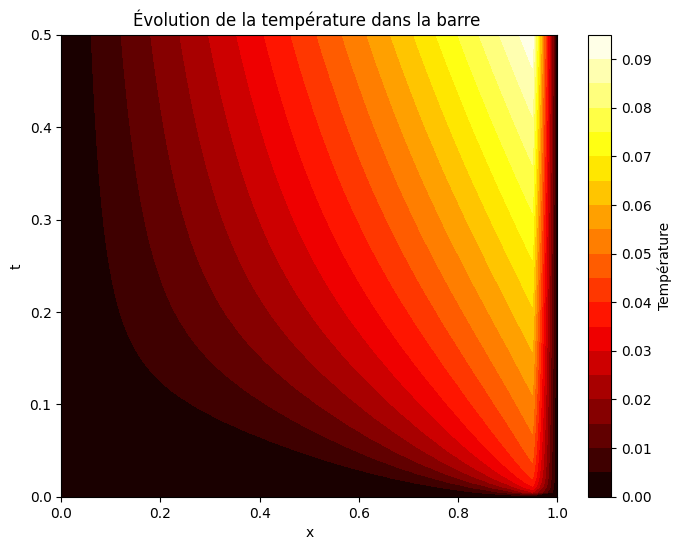

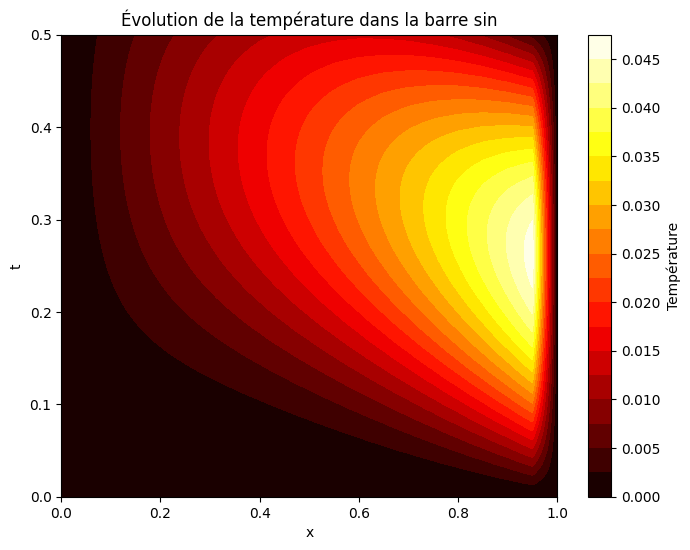

In [5]:
import numpy as np
import matplotlib.pyplot as plt

L = 1.0       
T = 0.5       
Nx = 20       
Nt = 100    

def heat_equation(L, T, Nx, Nt, u_func):

 
    dx = L / Nx
    dt = T / Nt
    x = np.linspace(0, L, Nx + 1)
    t = np.linspace(0, T, Nt + 1)

    alpha = dt / dx**2
    A = np.diag(2 * np.ones(Nx - 1)) - np.diag(np.ones(Nx - 2), -1) - np.diag(np.ones(Nx - 2), 1)
    I = np.eye(Nx - 1)

    Y = np.zeros((Nt + 1, Nx + 1))  
    b = np.zeros(Nx - 1)            

    for k in range(1, Nt + 1):
        # Neumann 
        b[-1] = dt * u_func(t[k]) / dx
        Y[k, 1:Nx] = np.linalg.solve(I + alpha * A, Y[k - 1, 1:Nx] + b)

    return x, t, Y
  

#flux 
def u_func(t):
    return 2 * t + 1

# Flux 
def u_func_sin(t):
    return np.sin(2 * np.pi * t)


#Test linéaire
x, t, Y = heat_equation(L, T, Nx, Nt, u_func)
X, T_grid = np.meshgrid(x, t)
plt.figure(figsize=(8, 6))
plt.contourf(X, T_grid, Y, 20, cmap='hot')
plt.colorbar(label="Température")
plt.xlabel("x")
plt.ylabel("t")
plt.title("Évolution de la température dans la barre ")
plt.show()

#Test sinus
x, t, Y = heat_equation(L, T, Nx, Nt, u_func_sin )
X, T_grid = np.meshgrid(x, t)
plt.figure(figsize=(8, 6))
plt.contourf(X, T_grid, Y, 20, cmap='hot')
plt.colorbar(label="Température")
plt.xlabel("x")
plt.ylabel("t")
plt.title("Évolution de la température dans la barre sin")
plt.show()
